In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import warnings 
warnings.filterwarnings('ignore')

In [2]:
#downloading the data set
path = kagglehub.dataset_download("uciml/adult-census-income")
print("Path to dataset files:", path)

Path to dataset files: C:\Users\Sushant\.cache\kagglehub\datasets\uciml\adult-census-income\versions\3


In [3]:
import os
print(os.listdir(path))

['adult.csv']


In [4]:
#loading the dtaset
df = pd.read_csv(os.path.join(path,"adult.csv"))
print(df.head())

   age workclass  fnlwgt     education  education.num marital.status  \
0   90         ?   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66         ?  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race     sex  capital.gain  \
0                  ?  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2                  ?      Unmarried  Black  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   

   capital.loss  hours.per.week native.country income  
0          4356              40  United-States  <=50K  
1          4356              18  United-States

Performing EDA - Exploratory Data Analysis

In [5]:
print("="*60)
print("Step 2 Performing the EDA ")
print("="*60)

print(f"The Rows of the data --> ({df.shape[0]})")
print(f"The Columns of the data --> ({df.shape[1]})")
print(f"Null Counts Of the Data -- >\n{df.isnull().sum()}")
print("="*60)
print(f"Datatype of the Columns -->\n{df.dtypes}")
print("="*60)
print(f"Memory Usage -- > {df.memory_usage(deep=True).sum()/1024:.2f}KB")
print(df['income'].value_counts(normalize=True))

Step 2 Performing the EDA 
The Rows of the data --> (32561)
The Columns of the data --> (15)
Null Counts Of the Data -- >
age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64
Datatype of the Columns -->
age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object
Memory Usage -- > 18070.45KB
income
<=50K    0.75919
>50K     0.24081
Name: proportion, dtype: float64


In [6]:
#checking of the ? missing N/A None
val = ['?', 'missing', 'n/a']
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.strip().str.lower()
    count = df[col].isin(val).sum()
    print(f"{col}: {count}")
print("="*60)
print('replacing the Values')
df.replace(val,np.nan,inplace=True)
print(f"The Null count is -->\n{df.isnull().sum()}")

workclass: 1836
education: 0
marital.status: 0
occupation: 1843
relationship: 0
race: 0
sex: 0
native.country: 583
income: 0
replacing the Values
The Null count is -->
age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64


In [7]:
#chaning the data to the Unknown 
missing_cols = [
    'workclass','occupation','native.country'
]
df[missing_cols] = df[missing_cols].fillna('unknown')
print(f"The null count is -->\n{df.isnull().sum()}")

The null count is -->
age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64


In [8]:
print(f"The information of the Data{df.info()}")
print("="*75)
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
The information of the DataNone
                age        fnlwgt  education.num  capital.gai

In [9]:
#unique value and data quality
for col in df.columns:
    unique_values = df[col].nunique()
    print(f"{col}: ({df[col].dtype})")
    print(f"Unique Values = ({unique_values})")
print('='*60)
for col in df.columns:
    unique_val = df[col].nunique()
    if df[col].dtype == 'object' and unique_val < 20:
        print(f"Value Counts\n{df[col].value_counts().to_string()}")

age: (int64)
Unique Values = (73)
workclass: (object)
Unique Values = (9)
fnlwgt: (int64)
Unique Values = (21648)
education: (object)
Unique Values = (16)
education.num: (int64)
Unique Values = (16)
marital.status: (object)
Unique Values = (7)
occupation: (object)
Unique Values = (15)
relationship: (object)
Unique Values = (6)
race: (object)
Unique Values = (5)
sex: (object)
Unique Values = (2)
capital.gain: (int64)
Unique Values = (119)
capital.loss: (int64)
Unique Values = (92)
hours.per.week: (int64)
Unique Values = (94)
native.country: (object)
Unique Values = (42)
income: (object)
Unique Values = (2)
Value Counts
workclass
private             22696
self-emp-not-inc     2541
local-gov            2093
unknown              1836
state-gov            1298
self-emp-inc         1116
federal-gov           960
without-pay            14
never-worked            7
Value Counts
education
hs-grad         10501
some-college     7291
bachelors        5355
masters          1723
assoc-voc        13

In [10]:
#finding the corr() with income 
#income is object first need to create it to number
def clean_income(val):
    val = str(val).strip().lower()
    if val in ['<=50k']:
        return 0
    elif val in ['>50k']:
        return 1
    return np.nan
df['income'] = df['income'].apply(clean_income).astype(int)
print(df['income'].dtype)

int64


In [11]:
df['income'].value_counts()

income
0    24720
1     7841
Name: count, dtype: int64

<Axes: >

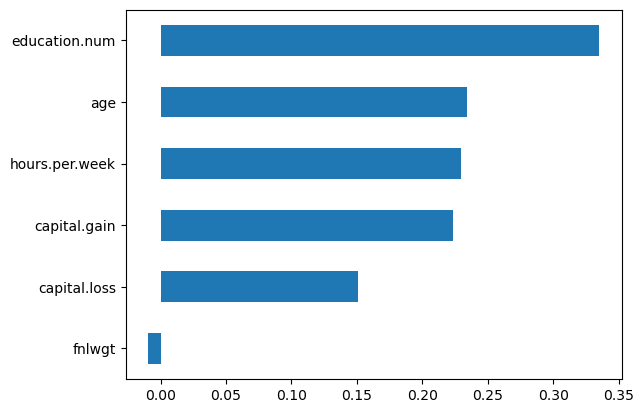

In [12]:
#finding the correaltion ()
numeric_cols = df.select_dtypes(include='int64')
corr_matrix = numeric_cols.corr()['income'].drop('income')
corr_matrix.sort_values().plot(kind='barh')

In [13]:
(df['income'].value_counts(normalize=True)*100)

income
0    75.919044
1    24.080956
Name: proportion, dtype: float64

In [14]:
#numeric features saperations 0 = <=50 , 1= >50k
print(f"Group by Age --> {df.groupby('income')['age'].mean()}") #average age of each income group 
print(f"Group by Hours_per_week --> {df.groupby('income')['hours.per.week'].mean()}") #Average HPW 
print(f"Group by Education--> {df.groupby('income')['education.num'].mean()}") #average education 
# 9--> HIgh School Grad , 10--> Some- college 


Group by Age --> income
0    36.783738
1    44.249841
Name: age, dtype: float64
Group by Hours_per_week --> income
0    38.840210
1    45.473026
Name: hours.per.week, dtype: float64
Group by Education--> income
0     9.595065
1    11.611657
Name: education.num, dtype: float64


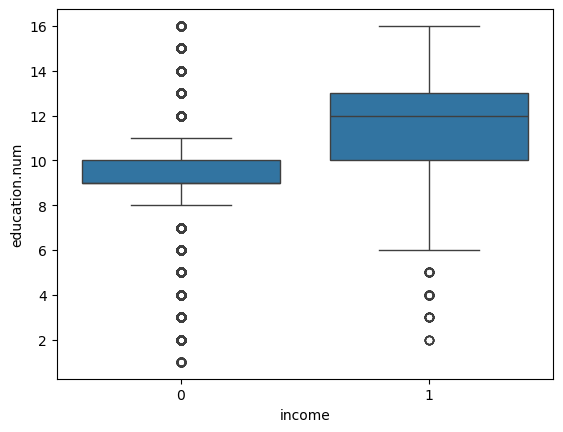

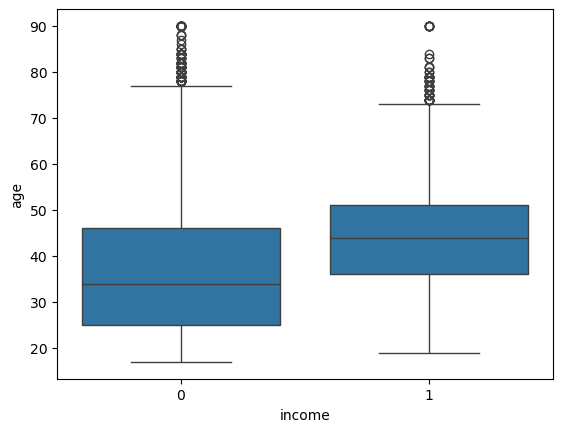

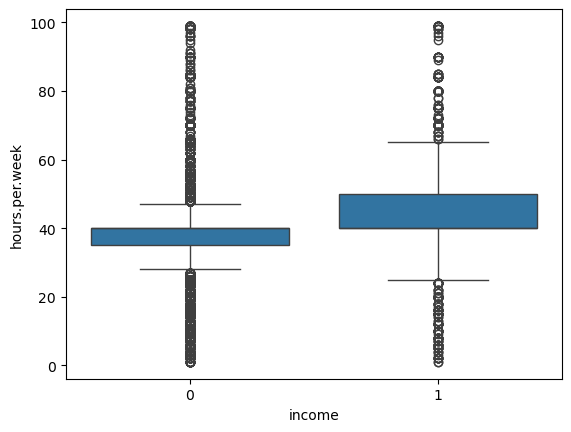

In [15]:
#visualisation
sns.boxplot(x='income',y='education.num',data=df)
plt.show()
sns.boxplot(x='income',y='age',data=df)
plt.show()
sns.boxplot(x='income',y='hours.per.week',data=df)
plt.show()

In [16]:
#categorical vs target crosstab
crosstab_education = pd.crosstab(df['education'],df['income'],normalize='index')
crosstab_marital = pd.crosstab(df['marital.status'],df['income'],normalize='index')
crosstab_occu = pd.crosstab(df['occupation'],df['income'],normalize='index')
print(f"{crosstab_education*100}")
print('='*60)
print(f"{crosstab_marital*100}")
print('='*60)
print(f"{crosstab_occu*100}")

income                 0          1
education                          
10th           93.354770   6.645230
11th           94.893617   5.106383
12th           92.378753   7.621247
1st-4th        96.428571   3.571429
5th-6th        95.195195   4.804805
7th-8th        93.808050   6.191950
9th            94.747082   5.252918
assoc-acdm     75.164011  24.835989
assoc-voc      73.878437  26.121563
bachelors      58.524743  41.475257
doctorate      25.907990  74.092010
hs-grad        84.049138  15.950862
masters        44.341265  55.658735
preschool     100.000000   0.000000
prof-school    26.562500  73.437500
some-college   80.976546  19.023454
income                         0          1
marital.status                             
divorced               89.579113  10.420887
married-af-spouse      56.521739  43.478261
married-civ-spouse     55.315171  44.684829
married-spouse-absent  91.866029   8.133971
never-married          95.403913   4.596087
separated              93.560976   6.439024


In [17]:
#discarding the reduntant columns 
Values = df[['education','education.num']].drop_duplicates().sort_values('education.num')
print(Values.to_string(index=False))

   education  education.num
   preschool              1
     1st-4th              2
     5th-6th              3
     7th-8th              4
         9th              5
        10th              6
        11th              7
        12th              8
     hs-grad              9
some-college             10
   assoc-voc             11
  assoc-acdm             12
   bachelors             13
     masters             14
 prof-school             15
   doctorate             16


In [18]:
"""
  education  education.num
   preschool              1
     1st-4th              2
     5th-6th              3
     7th-8th              4
         9th              5
        10th              6
        11th              7
        12th              8
     hs-grad              9
some-college             10
   assoc-voc             11
  assoc-acdm             12
   bachelors             13
     masters             14
 prof-school             15
   doctorate             16
   """

'\n  education  education.num\n   preschool              1\n     1st-4th              2\n     5th-6th              3\n     7th-8th              4\n         9th              5\n        10th              6\n        11th              7\n        12th              8\n     hs-grad              9\nsome-college             10\n   assoc-voc             11\n  assoc-acdm             12\n   bachelors             13\n     masters             14\n prof-school             15\n   doctorate             16\n   '

In [19]:
df = df.drop('education',axis=1)
print(df)

       age workclass  fnlwgt  education.num      marital.status  \
0       90   unknown   77053              9             widowed   
1       82   private  132870              9             widowed   
2       66   unknown  186061             10             widowed   
3       54   private  140359              4            divorced   
4       41   private  264663             10           separated   
...    ...       ...     ...            ...                 ...   
32556   22   private  310152             10       never-married   
32557   27   private  257302             12  married-civ-spouse   
32558   40   private  154374              9  married-civ-spouse   
32559   58   private  151910              9             widowed   
32560   22   private  201490              9       never-married   

              occupation   relationship   race     sex  capital.gain  \
0                unknown  not-in-family  white  female             0   
1        exec-managerial  not-in-family  white  fem

Outliers Check 

Visual Check Not With IQR

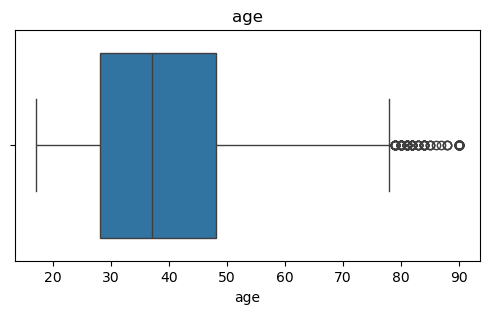

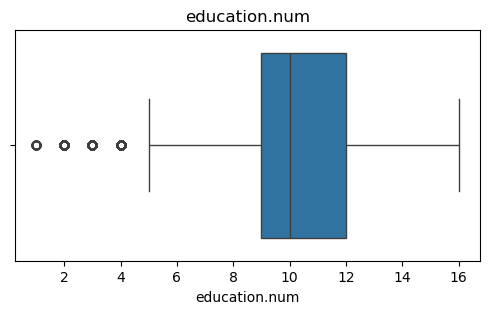

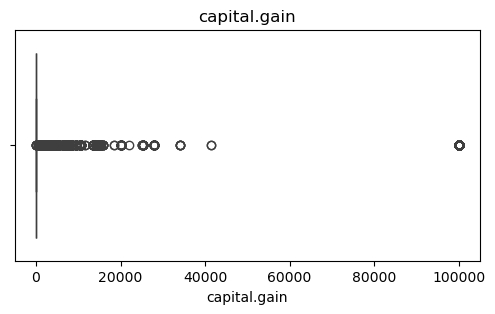

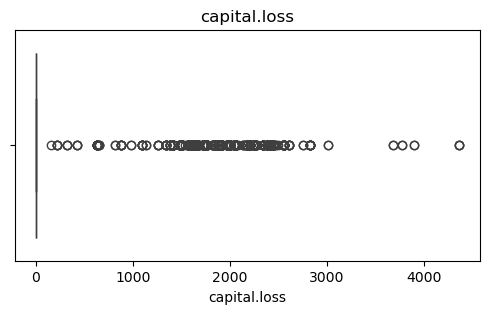

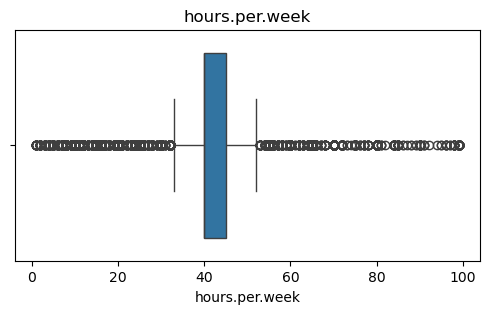

In [20]:
numeric_cols = df.select_dtypes(include='int64').drop(columns=['fnlwgt','income'])
for col in numeric_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.show()
    

In [21]:
#Checkig the quantiles 
for col in numeric_cols:
    print(f"{col}")
    print(df[col].describe(percentiles=[0.01,0.05,0.95,0.99]))

#most peoples are between 99% of age 17 and 74

age
count    32561.000000
mean        38.581647
std         13.640433
min         17.000000
1%          17.000000
5%          19.000000
50%         37.000000
95%         63.000000
99%         74.000000
max         90.000000
Name: age, dtype: float64
education.num
count    32561.000000
mean        10.080679
std          2.572720
min          1.000000
1%           3.000000
5%           5.000000
50%         10.000000
95%         14.000000
99%         16.000000
max         16.000000
Name: education.num, dtype: float64
capital.gain
count    32561.000000
mean      1077.648844
std       7385.292085
min          0.000000
1%           0.000000
5%           0.000000
50%          0.000000
95%       5013.000000
99%      15024.000000
max      99999.000000
Name: capital.gain, dtype: float64
capital.loss
count    32561.000000
mean        87.303830
std        402.960219
min          0.000000
1%           0.000000
5%           0.000000
50%          0.000000
95%          0.000000
99%       1980.000000
m

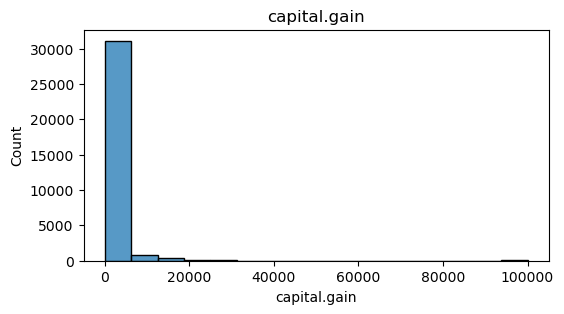

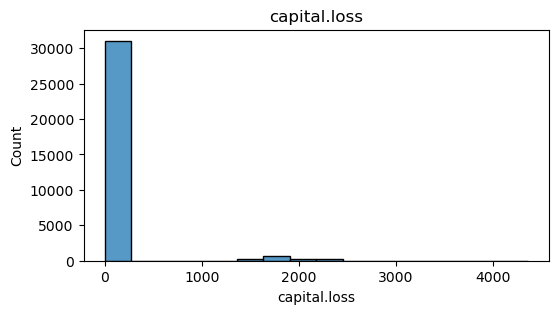

In [22]:
capital_cols = ['capital.gain','capital.loss']
y = df['income']
for col in capital_cols:
    plt.figure(figsize=(6,3))
    sns.histplot(x=df[col])
    plt.title(col)
    plt.show()

In [23]:
#preprocessing and Feature Engineering 
#already dropped the redundant columns 
DF = df.copy()

In [24]:
print(DF.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education.num   32561 non-null  int64 
 4   marital.status  32561 non-null  object
 5   occupation      32561 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   capital.gain    32561 non-null  int64 
 10  capital.loss    32561 non-null  int64 
 11  hours.per.week  32561 non-null  int64 
 12  native.country  32561 non-null  object
 13  income          32561 non-null  int64 
dtypes: int64(7), object(7)
memory usage: 3.5+ MB
None


In [25]:
#handling the skewed fet
DF['has_capital_gain'] = (DF['capital.gain'] > 0).astype(int)
DF['has_capital_loss'] = (DF['capital.loss'] > 0).astype(int)

print(DF['has_capital_gain'].value_counts())
print(DF['has_capital_loss'].value_counts())

has_capital_gain
0    29849
1     2712
Name: count, dtype: int64
has_capital_loss
0    31042
1     1519
Name: count, dtype: int64


In [26]:
#nominal categorical columns
categorical_cols = DF.select_dtypes(include='object').columns
DF_encoded = pd.get_dummies(
    DF, columns=categorical_cols, drop_first=True,dtype=int
)
DF_encoded.head(10)

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income,has_capital_gain,has_capital_loss,workclass_local-gov,...,native.country_puerto-rico,native.country_scotland,native.country_south,native.country_taiwan,native.country_thailand,native.country_trinadad&tobago,native.country_united-states,native.country_unknown,native.country_vietnam,native.country_yugoslavia
0,90,77053,9,0,4356,40,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,82,132870,9,0,4356,18,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,66,186061,10,0,4356,40,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,54,140359,4,0,3900,40,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,41,264663,10,0,3900,40,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
5,34,216864,9,0,3770,45,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
6,38,150601,6,0,3770,40,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
7,74,88638,16,0,3683,20,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
8,68,422013,9,0,3683,40,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
9,41,70037,10,0,3004,60,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [27]:
print("Original shape:", DF.shape)
print("Encoded shape:", DF_encoded.shape)


Original shape: (32561, 16)
Encoded shape: (32561, 88)


In [28]:
#final check 
print(DF_encoded.isnull().sum().sum())
print(DF_encoded.select_dtypes(include='object'))

0
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[32561 rows x 0 columns]


In [29]:
#saperating the Data 
X = DF_encoded.drop('income',axis=1)
y = DF_encoded['income']
print(X.shape)
print(y.shape)
print(y.value_counts(normalize=True))

(32561, 87)
(32561,)
income
0    0.75919
1    0.24081
Name: proportion, dtype: float64


In [30]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y , test_size=0.2, random_state=42, stratify=y)

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.model_selection import cross_val_score, GridSearchCV
#trainning the basic decision tree 
dt_basic = DecisionTreeClassifier(random_state=42)
dt_basic.fit(X_train, y_train)
y_pred_basic = dt_basic.predict(X_test)

In [32]:
print(f"Accuracy: {accuracy_score(y_test, y_pred_basic)*100}") #overall % of correct pred 
print(f"Recall Score: {recall_score(y_test,y_pred_basic)*100}")#outof all +ve cases that are corrrectly pred
print(f"Precision Score: {precision_score(y_test,y_pred_basic)*100}") #outof all pred+ve cases that are actually positive 
print(f"F1 Score: {f1_score(y_test,y_pred_basic)*100}")
print(f"Tree_depth:{dt_basic.get_depth()}")
print(f"NUm Leaves :{dt_basic.get_n_leaves()}")

Accuracy: 81.14540150468295
Recall Score: 61.86224489795919
Precision Score: 60.62499999999999
F1 Score: 61.23737373737374
Tree_depth:54
NUm Leaves :3801


In [33]:
#hyper Parameter tuning 
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 10, 15, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': ['sqrt', None],
}

grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose = 0
           
)
grid_search.fit(X_train,y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
0.6801686484256025


In [34]:
best_dt = grid_search.best_estimator_

y_pred_tuned = best_dt.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_pred_tuned))
print("Test Precision:", precision_score(y_test, y_pred_tuned))
print("Test Recall:", recall_score(y_test, y_pred_tuned))
print("Test F1:", f1_score(y_test, y_pred_tuned))

print("Depth:", best_dt.get_depth())
print("Leaves:", best_dt.get_n_leaves())

Test Accuracy: 0.8532166436358053
Test Precision: 0.7665505226480837
Test Recall: 0.5612244897959183
Test F1: 0.6480117820324006
Depth: 10
Leaves: 256
